In [419]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [420]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [421]:
# Define the objective function
def objective(x, y):
    x1, x2 = x
    y1, y2 = y
    return np.sqrt((x1 - y1)**2 + (x2 - y2)**2)

# Function to find the optimal point given y and the filter
def find_optimal_point(y, filter_condition):
    filtered_X = np.array([point for point in X if filter_condition(point, y)])
    
    if len(filtered_X) == 0:
        return None, float('inf')

    min_distance = float('inf')
    optimal_point = None
    for point in filtered_X:
        dist = objective(point, y)
        if dist < min_distance:
            min_distance = dist
            optimal_point = point
    return optimal_point, min_distance

# Filter conditions
filter_conditions = {
    "A": lambda point, y: point[0] > y[0] and point[1] > y[1],
    "B": lambda point, y: point[0] > y[0] and point[1] < y[1],
    "C": lambda point, y: point[0] < y[0] and point[1] < y[1],
    "D": lambda point, y: point[0] < y[0] and point[1] > y[1]
}

# Run the optimization for each combination of y
result = {}
for key, filter_condition in filter_conditions.items():
    optimal_point, min_distance = find_optimal_point(y, filter_condition)
    result[f"optimal_point_{key}"] = optimal_point
    result[f"min_distance_{key}"] = min_distance

A = result["optimal_point_A"]
B = result["optimal_point_B"]
C = result["optimal_point_C"]
D = result["optimal_point_D"]

# Print the results
for key in filter_conditions.keys():
    print(f"Point {key}: {result[f'optimal_point_{key}']}")

Point A: [0.26071605 0.43635845]
Point B: [0.21315735 0.274245  ]
Point C: [0.10056103 0.27951775]
Point D: [0.20634391 0.44272557]


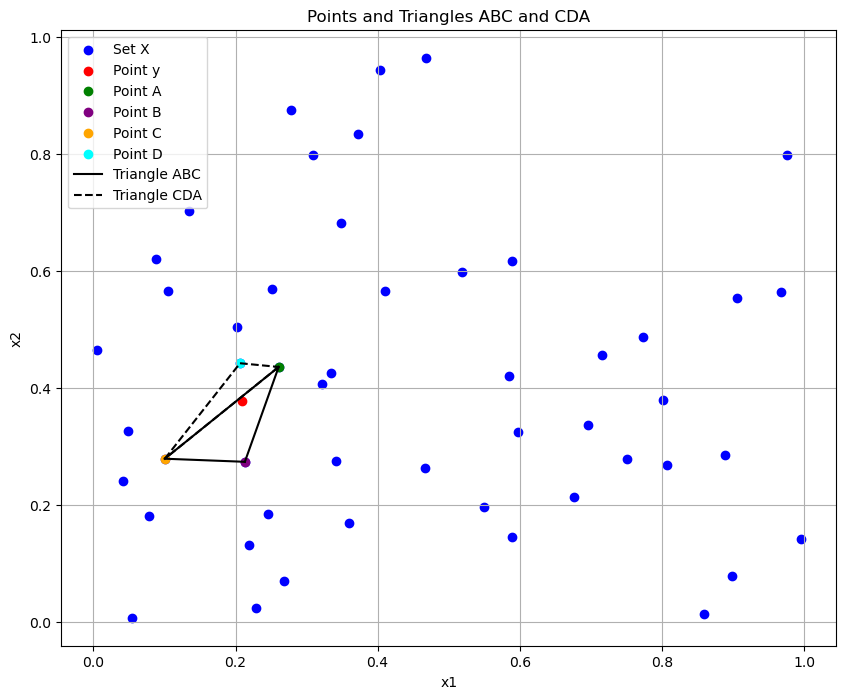

In [422]:
# Plot the points and triangles
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Set X')
plt.scatter(y[0], y[1], color='red', label='Point y')

# Plot triangles ABC and CDA if all points are found
if A is not None and B is not None and C is not None and D is not None:
    plt.scatter(A[0], A[1], color='green', label='Point A')
    plt.scatter(B[0], B[1], color='purple', label='Point B')
    plt.scatter(C[0], C[1], color='orange', label='Point C')
    plt.scatter(D[0], D[1], color='cyan', label='Point D')
    
    # Triangle ABC
    plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
    plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
    plt.plot([C[0], A[0]], [C[1], A[1]], 'k-', label='Triangle ABC')

    # Triangle CDA
    plt.plot([C[0], D[0]], [C[1], D[1]], 'k--')
    plt.plot([D[0], A[0]], [D[1], A[1]], 'k--')
    plt.plot([A[0], C[0]], [A[1], C[1]], 'k--', label='Triangle CDA')

# Add legend and labels
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points and Triangles ABC and CDA')
plt.grid(True)
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [423]:
r1ABC = ((B[1]-C[1])*(y[0]-C[0])+(C[0]-B[0])*(y[1]-C[1]))/((B[1]-C[1])*(A[0]-C[0])+(C[0]-B[0])*(A[1]-C[1]))
r2ABC = ((C[1]-A[1])*(y[0]-C[0])+(A[0]-C[0])*(y[1]-C[1]))/((B[1]-C[1])*(A[0]-C[0])+(C[0]-B[0])*(A[1]-C[1]))
r3ABC = 1-r1ABC-r2ABC

r1CDA = ((D[1]-A[1])*(y[0]-A[0])+(A[0]-D[0])*(y[1]-A[1]))/((D[1]-A[1])*(C[0]-A[0])+(A[0]-D[0])*(C[1]-A[1]))
r2CDA = ((A[1]-C[1])*(y[0]-A[0])+(C[0]-A[0])*(y[1]-A[1]))/((D[1]-A[1])*(C[0]-A[0])+(A[0]-D[0])*(C[1]-A[1]))
r3CDA = 1-r1CDA-r2CDA

print(f"r1ABC: {r1ABC}, r2ABC: {r2ABC}, r3ABC: {r3ABC}")
print(f"r1CDA: {r1CDA}, r2CDA: {r2CDA}, r3CDA: {r3CDA}")

r1ABC: 0.6286263152916166, r2ABC: 0.06910145494351515, r3ABC: 0.3022722297648682
r1CDA: 0.3682598757102867, r2CDA: -0.13392661883334067, r3CDA: 0.765666743123054


We can see that the point y is in the triangle ABC, since r1ABC, r2ABC and r3ABC are all in the interval [0,1]

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [424]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [425]:
algorithm = r1ABC*f(A) + r2ABC*f(B) + r3ABC*f(C)

true_value = f(y)

print(f"Algorithm: {algorithm:.5f}, True Value: {true_value:.5f}")

Algorithm: 0.08405, True Value: 0.07896


### The approximated value of f(y) is 0.084 which is fairly close to the true value 0.079

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [426]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.2,0.8),(0.5,0.5)]

In [427]:
# Define the objective function
def objective(x, y):
    x1, x2 = x
    y1, y2 = y
    return np.sqrt((x1 - y1)**2 + (x2 - y2)**2)

# Function to find the optimal point given y and the filter
def find_optimal_point(y, filter_condition):
    filtered_X = np.array([point for point in X if filter_condition(point, y)])
    
    if len(filtered_X) == 0:
        return None, float('inf')

    min_distance = float('inf')
    optimal_point = None
    for point in filtered_X:
        dist = objective(point, y)
        if dist < min_distance:
            min_distance = dist
            optimal_point = point
    return optimal_point, min_distance

# Filter conditions
filter_conditions = {
    "A": lambda point, y: point[0] > y[0] and point[1] > y[1],
    "B": lambda point, y: point[0] > y[0] and point[1] < y[1],
    "C": lambda point, y: point[0] < y[0] and point[1] < y[1],
    "D": lambda point, y: point[0] < y[0] and point[1] > y[1]
}

# Run the optimization for each combination of y
results = []
for y in Y:
    result = {'y': y}
    for key, filter_condition in filter_conditions.items():
        optimal_point, min_distance = find_optimal_point(y, filter_condition)
        result[f"optimal_point_{key}"] = optimal_point
        result[f"min_distance_{key}"] = min_distance
    A = result["optimal_point_A"]
    B = result["optimal_point_B"]
    C = result["optimal_point_C"]
    D = result["optimal_point_D"]
    if A is not None and B is not None and C is not None:
        result["r1ABC"] = ((B[1]-C[1])*(y[0]-C[0])+(C[0]-B[0])*(y[1]-C[1]))/((B[1]-C[1])*(A[0]-C[0])+(C[0]-B[0])*(A[1]-C[1]))
        result["r2ABC"] = ((C[1]-A[1])*(y[0]-C[0])+(A[0]-C[0])*(y[1]-C[1]))/((B[1]-C[1])*(A[0]-C[0])+(C[0]-B[0])*(A[1]-C[1]))
        result["r3ABC"] = 1-result["r1ABC"]-result["r2ABC"]
    else:
        result["r1ABC"] = result["r2ABC"] = result["r3ABC"] = None
    if C is not None and D is not None and A is not None:
        result["r1CDA"] = ((D[1]-A[1])*(y[0]-A[0])+(A[0]-D[0])*(y[1]-A[1]))/((D[1]-A[1])*(C[0]-A[0])+(A[0]-D[0])*(C[1]-A[1]))
        result["r2CDA"] = ((A[1]-C[1])*(y[0]-A[0])+(C[0]-A[0])*(y[1]-A[1]))/((D[1]-A[1])*(C[0]-A[0])+(A[0]-D[0])*(C[1]-A[1]))
        result["r3CDA"] = 1-result["r1CDA"]-result["r2CDA"]
    else:
        result["r1CDA"] = result["r2CDA"] = result["r3CDA"] = None
    if result["r1ABC"] is not None and result["r2ABC"] is not None and result["r3ABC"] is not None and result["r1CDA"] is not None and result["r2CDA"] is not None and result["r3CDA"] is not None:
        if 0 <= result["r1ABC"] <= 1 and 0 <= result["r2ABC"] <= 1 and 0 <= result["r3ABC"] <= 1:
            result["alg"] = r1ABC*f(A) + r2ABC*f(B) + r3ABC*f(C)
        else:
            result["alg"] = r1CDA*f(C) + r2CDA*f(D) + r3CDA*f(A)
    else:
        result["alg"] = None
    result["tv"] = f(y)
    results.append(result)

# Print the results
for result in results:
    print(f"y = {result['y']}")
    for key in filter_conditions.keys():
        print(f"Optimal point {key}: {result[f'optimal_point_{key}']} with distance {result[f'min_distance_{key}']}")
    print(f"r1ABC: {result['r1ABC']}, r2ABC: {result['r2ABC']}, r3ABC: {result['r3ABC']}")
    print(f"r1CDA: {result['r1CDA']}, r2CDA: {result['r2CDA']}, r3CDA: {result['r3CDA']}")
    if result['alg'] is not None:
        print(f"Final result using the algorithm: {result['alg']:.5f}")
    else:
        print(f"Final result using the algorithm: {result['alg']}")
    if result['tv'] is not None:
        print(f"True Value: {result['tv']:.5f}")
    else:
        print(f"True Value: {result['tv']}")
    print()

y = (0.2, 0.2)
Optimal point A: [0.21315735 0.274245  ] with distance 0.07540183289303902
Optimal point B: [0.24520427 0.18478708] with distance 0.04769548260513592
Optimal point C: [0.07872553 0.18082381] with distance 0.12278119677884311
Optimal point D: [0.10056103 0.27951775] with distance 0.12732313583995267
r1ABC: 0.1805466701524854, r2ABC: 0.5826765149253863, r3ABC: 0.23677681492212832
r1CDA: 0.7507400810688765, r2CDA: -0.7794749222521683, r3CDA: 1.028734841183292
Final result using the algorithm: 0.04418
True Value: 0.04000

y = (0.8, 0.2)
Optimal point A: [0.80718199 0.26836533] with distance 0.06874153566286949
Optimal point B: [0.89822733 0.07903432] with distance 0.15582459897592413
Optimal point C: [0.58907501 0.14639442] with distance 0.21763021053935477
Optimal point D: [0.75116956 0.27987271] with distance 0.09361656895624954
r1ABC: 0.5874166293573827, r2ABC: 0.2678463596528006, r3ABC: 0.14473701098981667
r1CDA: 0.4187612872222544, r2CDA: -1.5023945927888533, r3CDA: 2.0